# Environment Loading Examples

In this notebook, we walk through a few examples of how to load and interact with the Construction environments, both using discrete relative actions with graph observations, and using continuous absolute actions with image observations.

For further details, see the [Documentation](https://github.com/deepmind/dm_construction/blob/master/docs/index.md).

In [0]:
# Copyright 2020 DeepMind Technologies Limited
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Installation**

1. From the root of this repository, run `pip install .[demos]` to install both `dm_construction` and extra dependencies needed to run this notebook.
2. Install [ffmpeg](https://ffmpeg.org/):
  * Cross-platform with [Anaconda](https://docs.anaconda.com/anaconda/install/): `conda install ffmpeg`
  * Ubuntu: `apt-get install ffmpeg`
  * Mac with [Homebrew](https://brew.sh/): `brew install ffmpeg`

In [0]:
import base64
import tempfile
import textwrap

import dm_construction
from IPython.display import HTML
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np

In [0]:
## Helper Functions

def show_rgb_observation(rgb_observation, size=5):
  """Plots a RGB observation, as returned from a Unity environment.

  Args:
    rgb_observation: numpy array of pixels
    size: size to set the figure
  """
  _, ax = plt.subplots(figsize=(size, size))
  ax.imshow(rgb_observation)
  ax.set_axis_off()
  ax.set_aspect("equal")


def print_status(env_, time_step_):
  """Prints reward and episode termination information."""
  status = "r={}, p={}".format(time_step_.reward, time_step_.discount)
  if time_step_.discount == 0:
    status += " (reason: {})".format(env_.termination_reason)
  print(status)

## Supported tasks and wrappers

These are the tasks that can be loaded:

In [0]:
dm_construction.ALL_TASKS

['connecting', 'covering', 'covering_hard', 'marble_run', 'silhouette']

These are the wrappers that can be applied to the tasks:

In [0]:
dm_construction.ALL_WRAPPERS

['continuous_absolute', 'discrete_relative']

## Discrete Relative Actions and Graph Observations

The `discrete_relative` wrapper exposes graph-based discrete relative actions and graph observations. Here is an example of loading the Covering task with this wrapper and taking some actions in the environment.

Because the observations are graphs, they are not easy to visualize. Instead, we will grab image observations from the underyling task environment and display those instead.

In [0]:
# Create the environment.
env = dm_construction.get_environment(
    "covering", wrapper_type="discrete_relative", difficulty=0)

In [0]:
env.action_spec()

{'Index': Array(shape=(), dtype=dtype('int32'), name=None),
 'x_action': BoundedArray(shape=(), dtype=dtype('int32'), name=None, minimum=0, maximum=14),
 'sticky': BoundedArray(shape=(), dtype=dtype('int32'), name=None, minimum=0, maximum=1)}

In [0]:
env.observation_spec()

{'nodes': Array(shape=(0, 15), dtype=dtype('float32'), name='nodes_spec'),
 'edges': Array(shape=(0, 1), dtype=dtype('float32'), name='edges_spec'),
 'globals': Array(shape=(1, 1), dtype=dtype('float32'), name='globals_spec'),
 'n_node': Array(shape=(1,), dtype=dtype('int32'), name='n_node_spec'),
 'n_edge': Array(shape=(1,), dtype=dtype('int32'), name='n_edge_spec'),
 'receivers': Array(shape=(0,), dtype=dtype('int32'), name='receivers_spec'),
 'senders': Array(shape=(0,), dtype=dtype('int32'), name='senders_spec')}

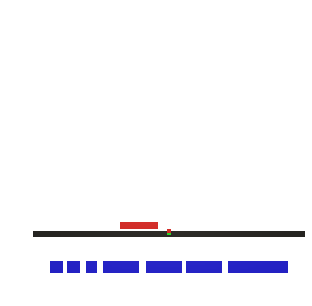

In [0]:
np.random.seed(1234)
time_step = env.reset()

# Get the image observation from the task environment.
show_rgb_observation(env.core_env.last_time_step.observation["RGB"])

r=-2.0, p=1.0


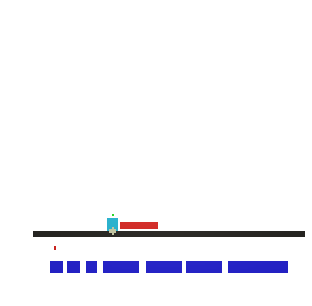

In [0]:
# Pick an edge.
obs = time_step.observation
moved_block = 0
base_block = 7
edge_index = list(
    zip(obs["senders"], obs["receivers"])).index((moved_block, base_block))

# Construct the action.
action = {
    "Index": edge_index,
    "sticky": 1,     # make it sticky
    "x_action": 0,   # place it to the left
}

time_step = env.step(action)
print_status(env, time_step)

# Get the image observation from the task environment.
show_rgb_observation(env.core_env.last_time_step.observation["RGB"])

r=1.6688453121526194, p=1.0


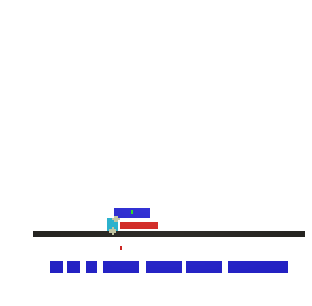

In [0]:
# Pick an edge.
obs = time_step.observation
moved_block = 3
base_block = len(obs["nodes"]) - 1
edge_index = list(
    zip(obs["senders"], obs["receivers"])).index((moved_block, base_block))

# Construct the action.
action = {
    "Index": edge_index,
    "sticky": 0,     # make it not sticky
    "x_action": 12,  # place it to the right
}

time_step = env.step(action)
print_status(env, time_step)

# Get the image observation from the task environment.
show_rgb_observation(env.core_env.last_time_step.observation["RGB"])

In [0]:
# Stop the environment.
env.close()

## Continuous Absolute Actions and Image Observations

The `continuous_absolute` wrapper exposes continuous absolute actions and image observations. Here is an example of loading the Covering task with this wrapper, taking some actions in the environment, and displaying the resulting observations.

In [0]:
# Create the environment.
env = dm_construction.get_environment(
    "covering", wrapper_type="continuous_absolute", difficulty=0)

In [0]:
env.action_spec()

{'Horizontal': BoundedArray(shape=(), dtype=dtype('float32'), name=None, minimum=-7.5, maximum=7.5),
 'Vertical': BoundedArray(shape=(), dtype=dtype('float32'), name=None, minimum=0.0, maximum=15.0),
 'Sticky': BoundedArray(shape=(), dtype=dtype('float32'), name=None, minimum=-1.0, maximum=1.0),
 'Selector': BoundedArray(shape=(), dtype=dtype('float32'), name=None, minimum=-7.0, maximum=7.0)}

In [0]:
env.observation_spec()

Array(shape=(64, 64, 3), dtype=dtype('uint8'), name='AgentCamera')

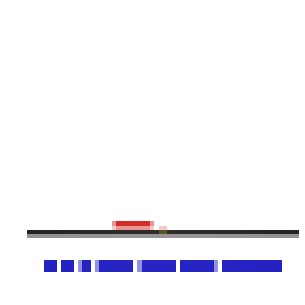

In [0]:
# Start a new episode.
np.random.seed(1234)
time_step = env.reset()

# This is the same observation that agents will see.
show_rgb_observation(time_step.observation)

r=0.0, p=1.0


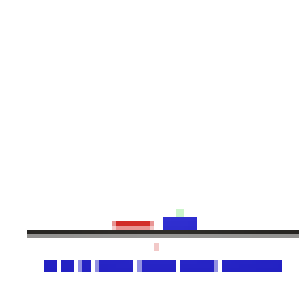

In [0]:
# Place a block a bit to the right.
action = {
    "Horizontal": 1,
    "Vertical": 1,
    "Sticky": -1,
    "Selector": 0
}

time_step = env.step(action)
show_rgb_observation(time_step.observation)
print_status(env, time_step)

r=-1.6036009365263264, p=1.0


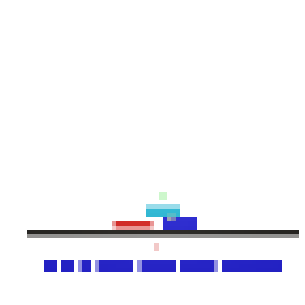

In [0]:
# Place another block in the center.
action = {
    "Horizontal": 0,
    "Vertical": 2,
    "Sticky": 1,
    "Selector": 0
}

time_step = env.step(action)
show_rgb_observation(time_step.observation)
print_status(env, time_step)

In [0]:
# Stop the environment.
env.close()

## Creating Videos

Because physics is simulated for many timesteps in between each action, it can be nice to grab all of those intermediate frames (the observations exposed to the agent are only the final frame of the simulation). To do this, we will enable a special observer camera in the underlying Unity environment and then pull frames from this to create a video.

In [0]:
def get_environment(problem_type, wrapper_type="discrete_relative",
                    difficulty=0, curriculum_sample=False):
  """Gets the environment.

  This function separately creates the unity environment and then passes it to
  the environment factory. We do this so that we can add an observer to the
  unity environment to get all frames from which we will create a video.

  Args:
    problem_type: the name of the task
    wrapper_type: the name of the wrapper
    difficulty: the difficulty level
    curriculum_sample: whether to sample difficulty from [0, difficulty]

  Returns:
    env_: the environment
  """
  # Separately construct the Unity env, so we can enable the observer camera
  # and set a higher resolution on it.
  unity_env = dm_construction.get_unity_environment(
      observer_width=600,
      observer_height=600,
      include_observer_camera=True,
      max_simulation_substeps=50)

  # Create the main environment by passing in the already-created Unity env.
  env_ = dm_construction.get_environment(
      problem_type, unity_env, wrapper_type=wrapper_type,
      curriculum_sample=curriculum_sample, difficulty=difficulty)

  # Create an observer to grab the frames from the observer camera.
  env_.core_env.enable_frame_observer()
  return env_


def make_video(frames_):
  """Creates a video from a given set of frames."""
  # Create the Matplotlib animation and save it to a temporary file.
  with tempfile.NamedTemporaryFile(suffix=".mp4") as fh:
    writer = animation.FFMpegWriter(fps=20)
    fig = plt.figure(frameon=False, figsize=(10, 10))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis("off")
    ax.set_aspect("equal")
    im = ax.imshow(np.zeros_like(frames_[0]), interpolation="none")
    with writer.saving(fig, fh.name, 50):
      for frame in frames_:
        im.set_data(frame)
        writer.grab_frame()
    plt.close(fig)

    # Read and encode the video to base64.
    mp4 = open(fh.name, "rb").read()
    data_url = "data:video/mp4;base64," + base64.b64encode(mp4).decode()

  # Display the video in the notebook.
  return HTML(textwrap.dedent(
      """
      <video controls>
            <source src="{}" type="video/mp4">
      </video>
      """.format(data_url).strip()))

In [0]:
# Create the environment.
env = get_environment("covering", wrapper_type="continuous_absolute")

# Reset the episode.
np.random.seed(1234)
time_step = env.reset()
frames = env.core_env.pop_observer_frames()

# Take an action.
action = {
    "Horizontal": 0,
    "Vertical": 5,
    "Sticky": 0,
    "Selector": 0
}
time_step = env.step(action)
print_status(env, time_step)

# Get all the intermediate frames.
frames.extend(env.core_env.pop_observer_frames())

# Stop the environment.
env.close()

# Display the results as a video. Here you can see the block falling from a
# large height and eventually colliding with an obstacle.
make_video(frames)

r=0.0, p=0.0 (reason: obstacle_hit)


In [0]:
# Create the environment.
env = get_environment("marble_run", wrapper_type="continuous_absolute")

# Reset the episode.
np.random.seed(1234)
time_step = env.reset()
frames = env.core_env.pop_observer_frames()

# Take an action.
action = {
    "Horizontal": 0,
    "Vertical": 5,
    "Sticky": 1,
    "Selector": 0
}
time_step = env.step(action)
print_status(env, time_step)

# Get all the intermediate frames.
frames.extend(env.core_env.pop_observer_frames())

# Stop the environment.
env.close()

# Display the results as a video
make_video(frames)

r=0.0, p=1.0
